**HR Analytics Project - Using Logistic Regression**

**Project Instructions**
1) Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2) Plot bar charts showing impact of employee salaries on retention
3) Plot bar charts showing corelation between department and employee retention
4) n
Now build logistic regression model using variables that were narrowed down in ste
5)  1
Measure the accuracy of the model

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv(r"C:\Users\pavan.vasa\OneDrive - Accenture\My Learning\Target MACHINE LEARNING 6 Months\HR_comma_sep_LogisticRegression_BinaryClassification.csv")
df.head()
df1 = df.drop(df[["Department", "salary"]], axis = 'columns')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
#Left Employees
left = df1[df1.left==1]
left.shape

(3571, 8)

In [8]:
#Retained Employees
retained = df1[df1.left==0]
retained.shape

(11428, 8)

trimming data without categorical variables

In [10]:
#Average Numbers for All Columns
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**From Above, we can conclude as follows:**

1) Employee Satisfaction seems to be low for employees who left with (0.44), when, compared with the employees who got retained (0.66)
2) Average Monthly hours are more for left employees compared with retained employees (199 Vs 207)
3) Employees who are given with promotion are likely to retain in the organization

**Impact of Salary on Employee Retention**

In [14]:
salary_left_table = pd.crosstab(df.salary, df.left)
salary_left_table

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

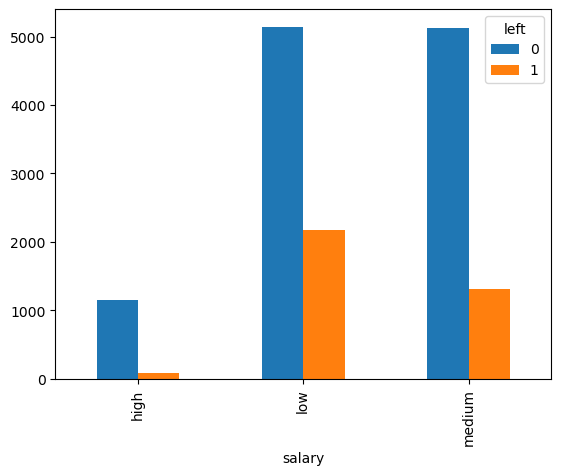

In [15]:
salary_left_table.plot(kind = 'bar')

Above Barchart shows, high salried employees are not likely to leave the organization

**Department wise Employee Retention**

In [18]:
department_left_table = pd.crosstab(df.Department, df.left)
department_left_table

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='Department'>

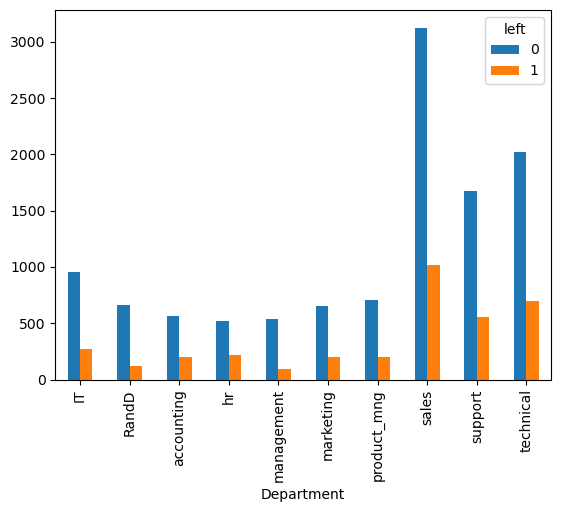

In [19]:
department_left_table.plot(kind='bar')

From above chart there seems to be some impact on employee retention but it is not major, hence, we will ignore department from our analysis

**From above analysis, we can use following variables in our analysis**

1) Satisfaction Level
2) Average Monthly Hours
3) Promotion Last 5 Years
4) Salary

In [23]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


Adding Dummies to Salry column, as it consists of the text

In [25]:
subdf_dummies = pd.get_dummies(subdf.salary, prefix = 'salary')
subdf_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [26]:
df_with_dummies = pd.concat([subdf, subdf_dummies], axis = 'columns' )
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [27]:
df_with_dummies1 = df_with_dummies.drop(['salary', 'salary_low'], axis = 'columns')
df_with_dummies1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,False,False
1,0.80,262,0,False,True
2,0.11,272,0,False,True
3,0.72,223,0,False,False
4,0.37,159,0,False,False
...,...,...,...,...,...
14994,0.40,151,0,False,False
14995,0.37,160,0,False,False
14996,0.37,143,0,False,False
14997,0.11,280,0,False,False


**Relation between satisfaction level and left**

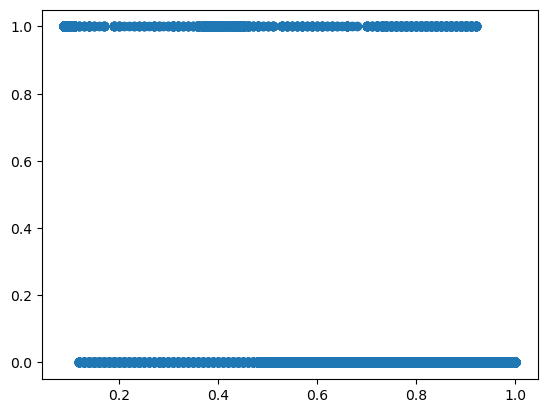

In [29]:
plt.scatter(df.satisfaction_level, df.left)
plt.show()

**Relation between Left and extra working hours**

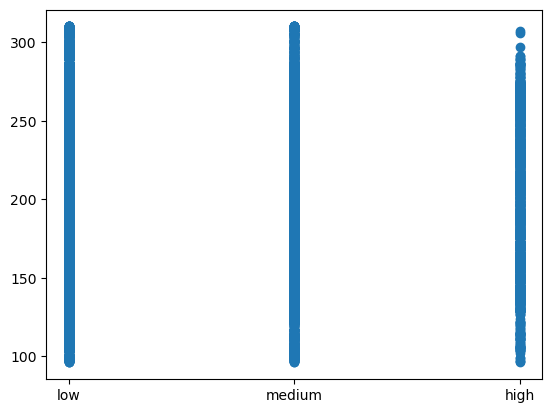

In [31]:
plt.scatter (df.salary, df.average_montly_hours)

**Relationship between promotion_last_5years and left**

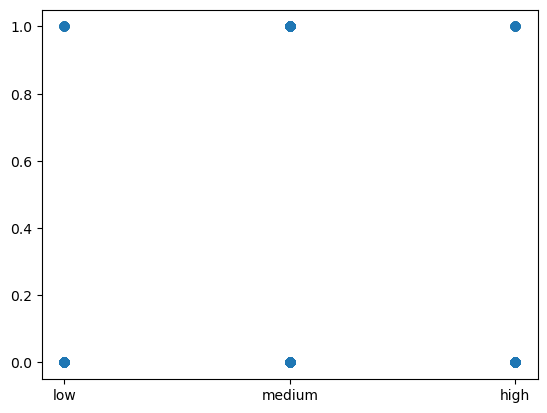

In [33]:
plt.scatter(df.salary, df.promotion_last_5years)

In [34]:
X = df_with_dummies1

In [35]:
y = df.left

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [37]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
6738,0.71,206,0,False,False
2271,0.61,231,0,False,False
11792,0.56,265,0,False,True
10022,0.98,214,0,False,False
9308,0.97,200,0,False,True
...,...,...,...,...,...
100,0.38,154,0,False,True
551,0.75,254,0,False,False
1808,0.36,136,0,False,False
5494,0.93,167,0,False,True


In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
print(model.score(X_test, y_test))

0.77


In [42]:
#With Job Satisfaction 0.3, average working hours 200 and low salary rate.
model.predict([[0.3, 200, 0, 0, 0]])

C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [43]:
model.predict([[0.99, 150, 1, 1, 0]])

C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Printing Confusion Matrix

In [45]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[2135,  165],
       [ 525,  175]], dtype=int64)

In [46]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'sn' is not defined

<Figure size 1000x700 with 0 Axes>